# Project Work 2

## Imports

In [65]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

## Define Evaluation Function

In [79]:
# define model evaluation function
def evaluate(y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)

    print('Accuracy:    ', accuracy)
    print('F1-Score:    ', f1)
    print('Precision:   ', precision)
    print('Recall:      ', recall)
    print()
    print(classification_report(y_test, y_pred))
    print()

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)

    disp.plot()

## Load and Preprocess Data

In [67]:
# load data into dataframe
df_dataset = pd.read_csv("phishing_email_projectthesis.csv") 

In [68]:
# rename columns
df_dataset = df_dataset.rename(columns={'text_combined': 'content'}).rename(columns={'label': 'target'}) 

In [69]:
# get shape
df_dataset.shape 

(82486, 2)

In [70]:
# drop duplicates but keep the first
df_dataset = df_dataset.drop_duplicates(keep='first') 

In [71]:
# get shape
df_dataset.shape

(82078, 2)

In [72]:
# check for missing values
df_dataset.isnull().sum() 

content    0
target     0
dtype: int64

target
1    42845
0    39233
Name: count, dtype: int64


Text(0.5, 1.0, 'Balance')

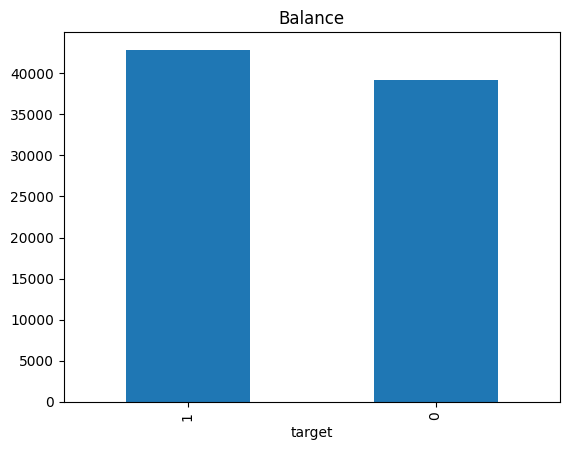

In [73]:
# show balance
df_dataset['target'].value_counts().plot(kind='bar') 
print(df_dataset['target'].value_counts())
plt.title('Balance')

In [74]:
# use randomized undersampling to achieve perfect balance
df_dataset = df_dataset.groupby('target').apply(lambda x: x.sample(39233, replace=True, random_state=42)).reset_index(drop=True)

/var/folders/gr/nkq2fp191y1_3wywjp14_sz00000gn/T/ipykernel_44190/1269030841.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_dataset = df_dataset.groupby('target').apply(lambda x: x.sample(39233, replace=True, random_state=42)).reset_index(drop=True)


target
0    39233
1    39233
Name: count, dtype: int64


Text(0.5, 1.0, 'Balance')

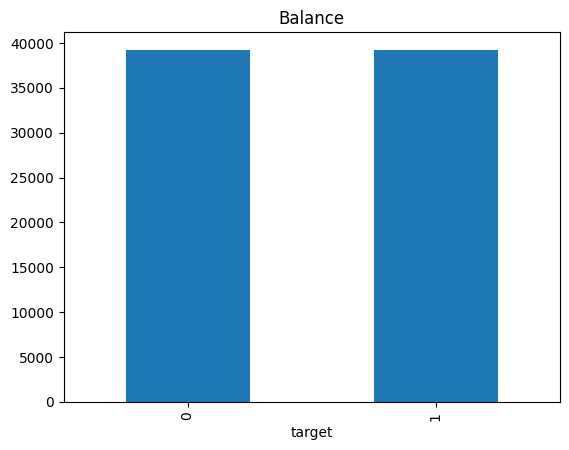

In [75]:
# show balance
df_dataset['target'].value_counts().plot(kind='bar') 
print(df_dataset['target'].value_counts())
plt.title('Balance')

## Split Data into Training and Testing

In [77]:
# define X and Y
X = df_dataset['content']
y = df_dataset['target']

# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the shape
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (62772,)
Shape of X_test: (15694,)
Shape of y_train: (62772,)
Shape of y_test: (15694,)


## Vectorization with TF-IDF

In [78]:
# creating vectorizer object 
vectorizer = TfidfVectorizer()

# fit on and tranform training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# transform test data 
X_test_tfidf = vectorizer.transform(X_test)

# check the shape
print("Shape of X_train_vect:", X_train_tfidf.shape)
print("Shape of X_test_vect:", X_test_tfidf.shape)

Shape of X_train_vect: (62772, 450154)
Shape of X_test_vect: (15694, 450154)


## Train and Compare Classification Models

### Dummy Classifier

Accuracy:     0.497260099401045
F1-Score:     0.4953306895228348
Precision:    0.49602869587496795
Recall:       0.49463464486458864

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      7866
           1       0.50      0.49      0.50      7828

    accuracy                           0.50     15694
   macro avg       0.50      0.50      0.50     15694
weighted avg       0.50      0.50      0.50     15694




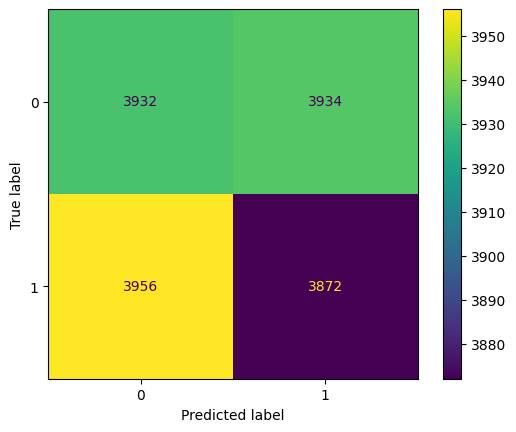

In [28]:
# creating classifier object with 'uniform'-strategy
dummy_tfidf_classifier = DummyClassifier(strategy='uniform', random_state=42)

# train classifier
dummy_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
dummy_tfidf_predictions = dummy_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(dummy_tfidf_predictions)

### Random Forest

Accuracy:     0.990697081687269
F1-Score:     0.9906350224502887
Precision:    0.994846688997681
Recall:       0.9864588656106286

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7866
           1       0.99      0.99      0.99      7828

    accuracy                           0.99     15694
   macro avg       0.99      0.99      0.99     15694
weighted avg       0.99      0.99      0.99     15694




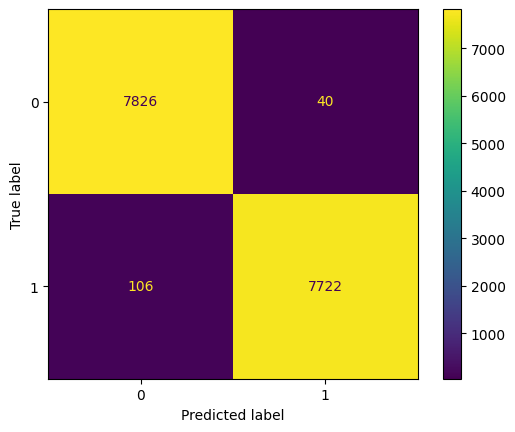

In [ ]:
# create classifier object
rf_tfidf_classifier = RandomForestClassifier(random_state=42)

# train classifier
rf_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
rf_tfidf_predictions = rf_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(rf_tfidf_predictions)


### Logistic Regression

Accuracy:     0.9887218045112782
F1-Score:     0.9887311389826192
Precision:    0.9855311587764944
Recall:       0.991951967296883

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7866
           1       0.99      0.99      0.99      7828

    accuracy                           0.99     15694
   macro avg       0.99      0.99      0.99     15694
weighted avg       0.99      0.99      0.99     15694




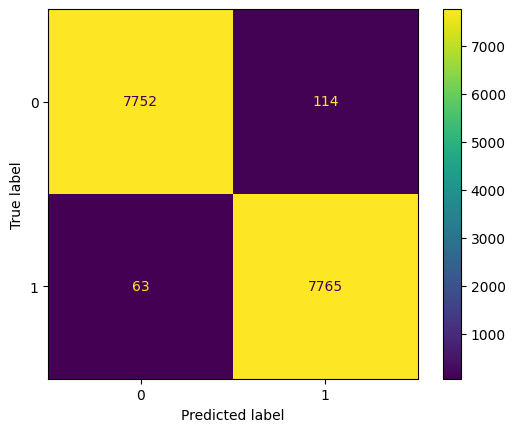

In [ ]:
# create classifier object
lr_tfidf_classifier = LogisticRegression(max_iter=10000, random_state=42)

# train classifier
lr_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
lr_tfidf_predictions = lr_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(lr_tfidf_predictions)

### Support Vector Machine

#### Linear

Accuracy:     0.9952848222250542
F1-Score:     0.9952751883539778
Precision:    0.9948940515700792
Recall:       0.9956566172713337

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7866
           1       0.99      1.00      1.00      7828

    accuracy                           1.00     15694
   macro avg       1.00      1.00      1.00     15694
weighted avg       1.00      1.00      1.00     15694




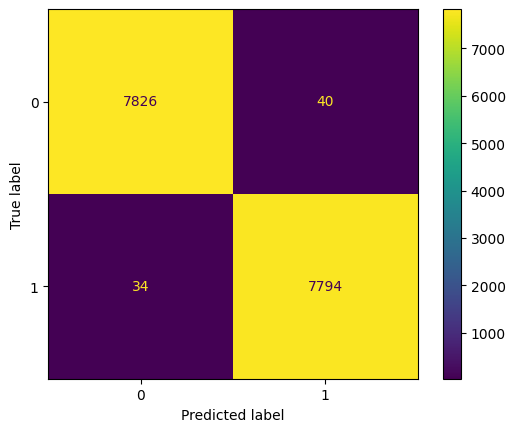

In [ ]:
# create classifier object
lsvm_tfidf_classifier = SVC(kernel="linear", random_state=42)

# train classifier
lsvm_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
lsvm_tfidf_prediction = lsvm_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(lsvm_tfidf_prediction)

#### Poly

Accuracy:     0.9831145660762075
F1-Score:     0.9828267772665413
Precision:    0.9973694594239116
Recall:       0.9687020950434339

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7866
           1       1.00      0.97      0.98      7828

    accuracy                           0.98     15694
   macro avg       0.98      0.98      0.98     15694
weighted avg       0.98      0.98      0.98     15694




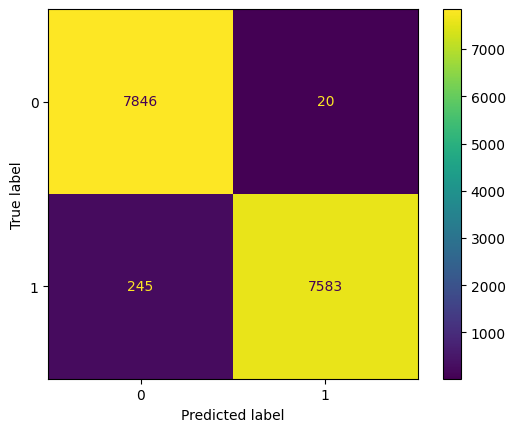

In [ ]:
# create classifier object
psvm_tfidf_classifier = SVC(kernel="poly", random_state=42)

# train classifier
psvm_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
psvm_tfidf_prediction = psvm_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(psvm_tfidf_prediction)

### Multinomial Naive Bayes

Accuracy:     0.9794188861985472
F1-Score:     0.9790599675850892
Precision:    0.9939449782809003
Recall:       0.9646142054164537

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7866
           1       0.99      0.96      0.98      7828

    accuracy                           0.98     15694
   macro avg       0.98      0.98      0.98     15694
weighted avg       0.98      0.98      0.98     15694




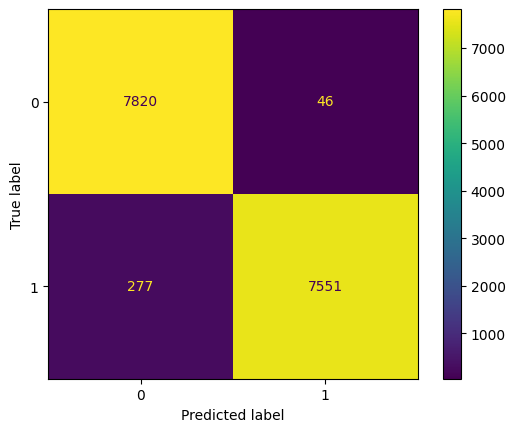

In [24]:
# create classifier object
mnb_tfidf_classifier = MultinomialNB()

# train classifier
mnb_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
mnb_tfidf_prediction = mnb_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(mnb_tfidf_prediction)

### K-Nearest Neighbors

Accuracy:     0.9792277303428062
F1-Score:     0.9791213013961829
Precision:    0.9817621371692782
Recall:       0.9764946346448646

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7866
           1       0.98      0.98      0.98      7828

    accuracy                           0.98     15694
   macro avg       0.98      0.98      0.98     15694
weighted avg       0.98      0.98      0.98     15694




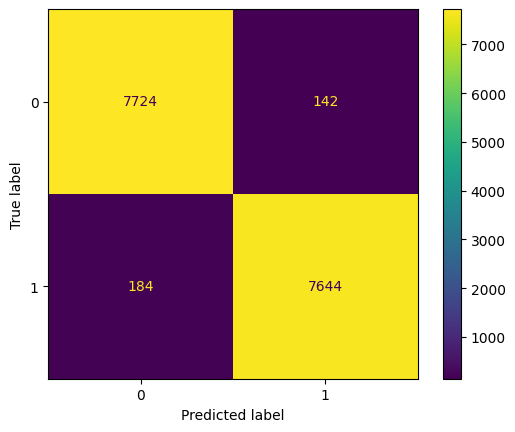

In [25]:
# create classifier object
knn_tfidf_classifier = KNeighborsClassifier()

# train classifier
knn_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
knn_tfidf_prediction = knn_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(knn_tfidf_prediction)


### Gradient Boosting Machine

Accuracy:     0.9425895246591054
F1-Score:     0.9434222919937205
Precision:    0.9277510188958874
Recall:       0.9596320899335717

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7866
           1       0.93      0.96      0.94      7828

    accuracy                           0.94     15694
   macro avg       0.94      0.94      0.94     15694
weighted avg       0.94      0.94      0.94     15694




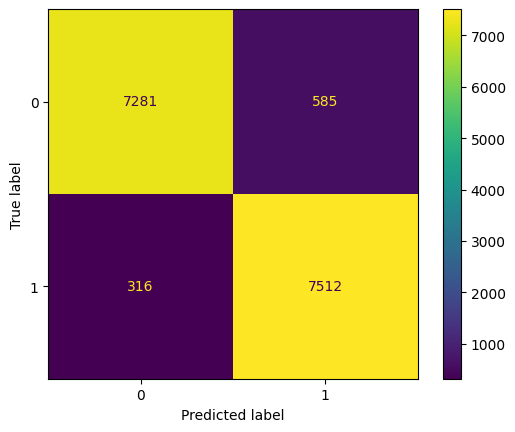

In [26]:
# create classifier object
gbm_tfidf_classifier = GradientBoostingClassifier(random_state=42)

# train classifier
gbm_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
gbm_tfidf_prediction = gbm_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(gbm_tfidf_prediction)

### Multi Layer Perceptron

/Users/nikobiebl/.local/share/virtualenvs/Project-Thesis-PGQKRxl5/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy:     0.9966229132152415
F1-Score:     0.9966145001596934
Precision:    0.9966781653251565
Recall:       0.9965508431272355

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7866
           1       1.00      1.00      1.00      7828

    accuracy                           1.00     15694
   macro avg       1.00      1.00      1.00     15694
weighted avg       1.00      1.00      1.00     15694




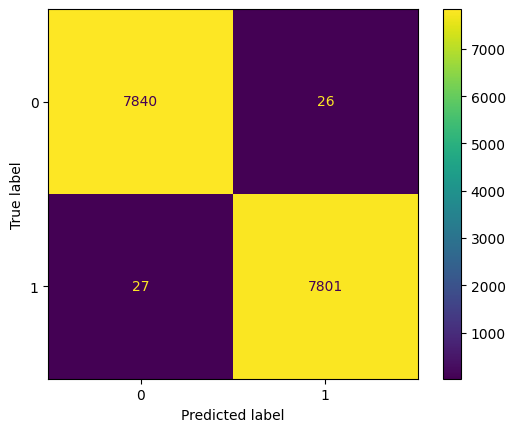

In [30]:
# create classifier object
mlp_tfidf_classifier = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=3,random_state=42)

# train classifier
mlp_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
mlp_tfidf_predictions = mlp_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(mlp_tfidf_predictions)

### Compare Model Performance

In [80]:
# save model performance as dataframe
model_perf = {
    "Classifier": ["MLP", "LSVM", "RF", "LR", "PSVM", "KNN", "MNB", "GBM"],
    "Accuracy": [0.997, 0.995, 0.991, 0.989, 0.983, 0.979, 0.979, 0.943],
    "F1-Score": [0.997, 0.995, 0.991, 0.989, 0.983, 0.979, 0.979, 0.943],
    "Precision": [0.997, 0.995, 0.995, 0.986, 0.997, 0.982, 0.994, 0.928],
    "Recall": [0.997, 0.996, 0.986, 0.992, 0.969, 0.976, 0.965, 0.960]
}

model_perf_df = pd.DataFrame(model_perf)
print(model_perf_df)

  Classifier  Accuracy  F1-Score  Precision  Recall
0        MLP     0.997     0.997      0.997   0.997
1       LSVM     0.995     0.995      0.995   0.996
2         RF     0.991     0.991      0.995   0.986
3         LR     0.989     0.989      0.986   0.992
4       PSVM     0.983     0.983      0.997   0.969
5        KNN     0.979     0.979      0.982   0.976
6        MNB     0.979     0.979      0.994   0.965
7        GBM     0.943     0.943      0.928   0.960


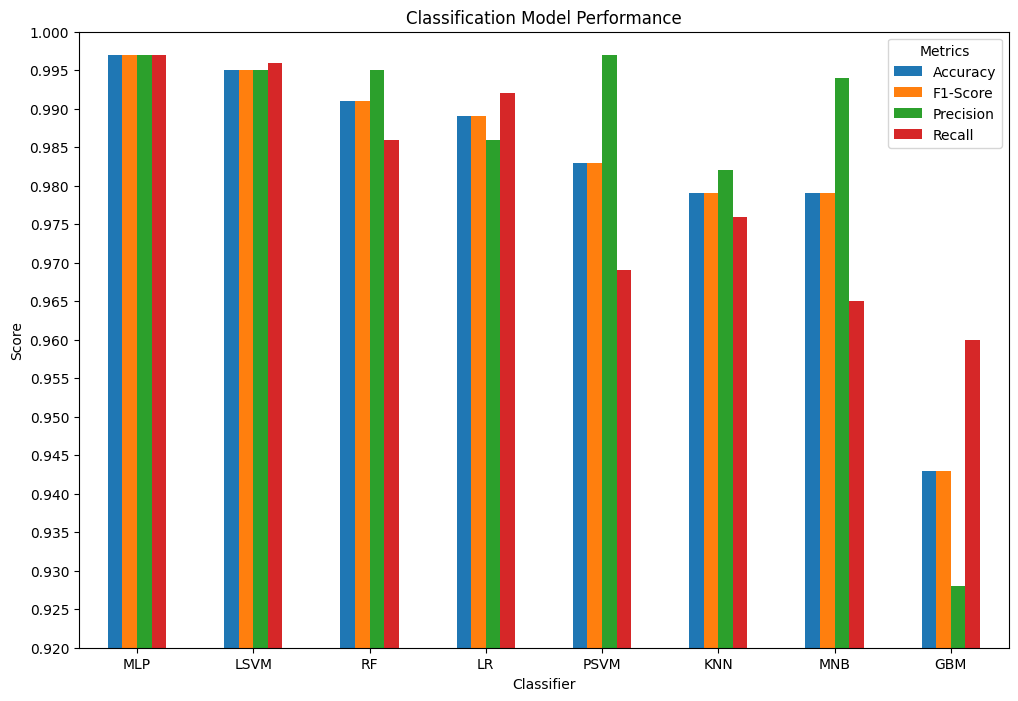

In [81]:
# plot model performance
ax = model_perf_df.set_index('Classifier').plot(kind='bar', figsize=(12, 8))
plt.title('Classification Model Performance')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.ylim(0.92, 1.0)
plt.legend(title='Metrics')
plt.xticks(rotation=0)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.005))

plt.show()

## Examination of Reject Option

In [82]:
# create a dataframe with predicted probabilities and actual values
probabilities = mlp_tfidf_classifier.predict_proba(X_test_tfidf)

probabilities_0 = probabilities[:, 0]
probabilities_1 = probabilities[:, 1]

actual_values = y_test

probabilities_and_values_df = pd.DataFrame({
    'probabilities_0': probabilities_0,
    'probabilities_1': probabilities_1,
    'actual_values': actual_values
})

# calculate model performance for different classification thresholds
thresholds = np.arange(0.5, 1.0, 0.01)

threshold_results = []

for threshold in thresholds:

    # determine classified emails dependent on treshold
    classifiable_df = probabilities_and_values_df[(probabilities_and_values_df['probabilities_0'] > threshold) | (probabilities_and_values_df['probabilities_1'] > threshold)]
    
    # calculate percentage
    percentage_classifiable = (len(classifiable_df) / len(probabilities_and_values_df)) * 100

    # determine perdicted label for classified emails
    predicted_labels = np.where(classifiable_df['probabilities_1'] > threshold, 1, 0)

    # calculate model performance on classified emails
    accuracy = accuracy_score(classifiable_df['actual_values'], predicted_labels) * 100
    precision = precision_score(classifiable_df['actual_values'], predicted_labels) * 100
    recall = recall_score(classifiable_df['actual_values'], predicted_labels) * 100
    f1 = f1_score(classifiable_df['actual_values'], predicted_labels) * 100

    # save results in dataframe
    threshold_results.append({
        'threshold': threshold,
        'classifiable': percentage_classifiable,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    })

results_df = pd.DataFrame(threshold_results)

print(results_df)

    threshold  classifiable   accuracy  precision     recall         f1
0        0.50    100.000000  99.662291  99.667817  99.655084  99.661450
1        0.51    100.000000  99.662291  99.667817  99.655084  99.661450
2        0.52     99.993628  99.662270  99.667817  99.655084  99.661450
3        0.53     99.993628  99.662270  99.667817  99.655084  99.661450
4        0.54     99.987256  99.662248  99.667817  99.655084  99.661450
5        0.55     99.980884  99.662227  99.667817  99.655084  99.661450
6        0.56     99.980884  99.662227  99.667817  99.655084  99.661450
7        0.57     99.980884  99.662227  99.667817  99.655084  99.661450
8        0.58     99.942653  99.674849  99.667774  99.680511  99.674142
9        0.59     99.936281  99.674828  99.667732  99.680470  99.674101
10       0.60     99.923538  99.674786  99.667689  99.680430  99.674059
11       0.61     99.917166  99.674766  99.667647  99.680389  99.674017
12       0.62     99.904422  99.681102  99.680389  99.680389  99

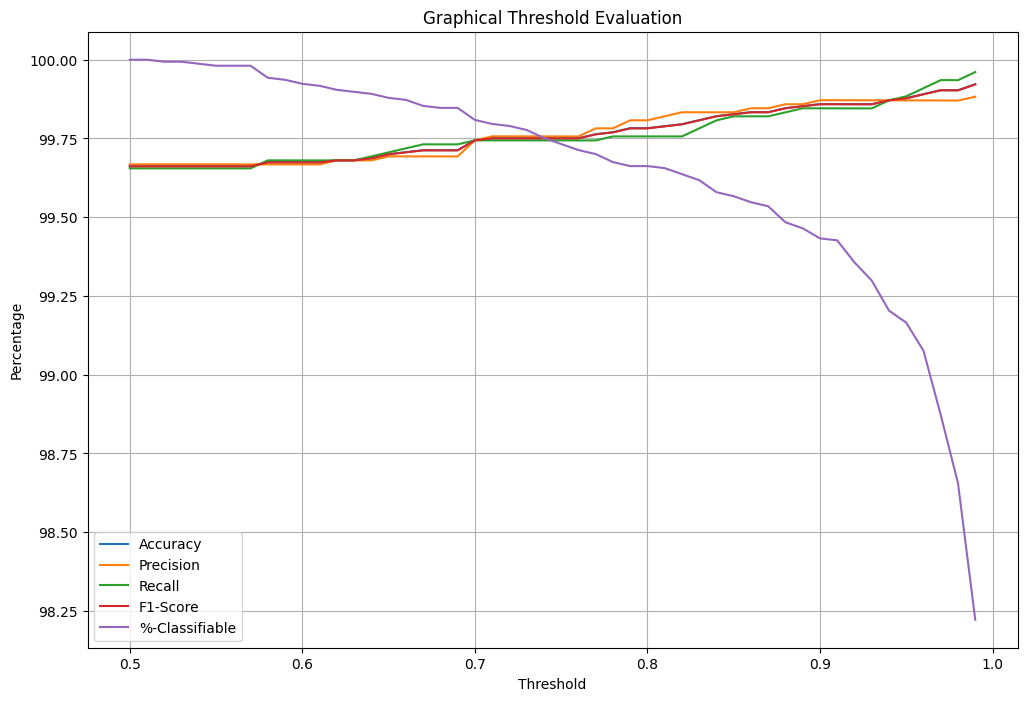

In [83]:
# plot results
plt.figure(figsize=(12, 8))

plt.plot(results_df['threshold'], results_df['accuracy'], label='Accuracy')
plt.plot(results_df['threshold'], results_df['precision'], label='Precision')
plt.plot(results_df['threshold'], results_df['recall'], label='Recall')
plt.plot(results_df['threshold'], results_df['f1'], label='F1-Score')
plt.plot(results_df['threshold'], results_df['classifiable'], label='%-Classifiable')

plt.xlabel('Threshold')
plt.ylabel('Percentage')
plt.title('Graphical Threshold Evaluation')
plt.legend()
plt.grid(True)
plt.show()